In [ ]:
!git clone https://github.com/miladalipour99/time_series_augmentation

Cloning into 'time_series_augmentation'...
remote: Enumerating objects: 158, done.
remote: Counting objects: 100% (158/158), done.
remote: Compressing objects: 100% (131/131), done.
remote: Total 158 (delta 89), reused 56 (delta 22), pack-reused 0
Receiving objects: 100% (158/158), 1.17 MiB | 10.07 MiB/s, done.
Resolving deltas: 100% (89/89), done.


In [ ]:
!rm -rf /content/time_series_augmentation

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
cd /content/time_series_augmentation

/content/time_series_augmentation


In [ ]:
cd content/

[Errno 2] No such file or directory: 'content/'
/content/time_series_augmentation


In [ ]:
from utils.input_data import read_data_sets
import utils.datasets as ds
import utils.augmentation as aug
import utils.helper as hlp

In [ ]:
dataset = "CBF"

nb_class = ds.nb_classes(dataset)
nb_dims = ds.nb_dims(dataset)

In [ ]:
import scipy.io
mat = scipy.io.loadmat('/content/ALZ_MAT_train.mat')


In [ ]:
mat['AD_train'][:,:,0].transpose()[0,:].shape

(130,)

In [ ]:
import numpy as np
AD_train_arr=np.zeros((2900,130))
AD_train_label_list=[]
qer=0
for idx in range(25):
  for iqx in range(116):
    AD_train_arr[qer,:]=mat['AD_train'][:,:,0].transpose()[iqx,:]
    AD_train_label_list.append(1.0)
    qer=qer+1


In [ ]:
AD_train_arr_dim = AD_train_arr.reshape((-1, 130, 1)) 

##whole matrix

In [ ]:
import scipy.io
mat = scipy.io.loadmat('/content/ALZ_MAT.mat')


In [ ]:
mat['Train'].shape

(130, 116, 88)

In [ ]:
import numpy as np
train_arr=np.zeros((10208,130))
qer=0
for idx in range(88):
  for iqx in range(116):
    train_arr[qer,:]=mat['Train'][:,:,idx].transpose()[iqx,:]
    qer=qer+1


In [ ]:
train_arr_dim = train_arr.reshape((-1, 130, 1)) 

In [ ]:
import numpy as np
CN_train_label_list=[]
qer=0
for idx in range(31):
  for iqx in range(116):
    CN_train_label_list.append(3.0)
    qer=qer+1


In [ ]:
full_lable=AD_train_label_list+MCI_train_label_list+CN_train_label_list

In [ ]:
Weighted Dynamic Time Series Barycenter Averaging

In [ ]:
# Load Data
train_data_file = os.path.join("/content/time_series_augmentation/data", dataset, "%s_TRAIN.tsv"%dataset)
test_data_file = os.path.join("/content/time_series_augmentation/data", dataset, "%s_TEST.tsv"%dataset)

x_train, y_train, x_test, y_test = read_data_sets(train_data_file, "", test_data_file, "", delimiter="\t")

y_train = ds.class_offset(y_train, dataset)
y_test= ds.class_offset(y_test, dataset)
nb_timesteps = int(x_train.shape[1] / nb_dims)
input_shape = (nb_timesteps , nb_dims)

x_train_max = np.max(x_train)
x_train_min = np.min(x_train)
x_train = 2. * (x_train - x_train_min) / (x_train_max - x_train_min) - 1.
# Test is secret
x_test = 2. * (x_test - x_train_min) / (x_train_max - x_train_min) - 1.
print(x_test.shape)
print(x_train.shape)
x_test = x_test.reshape((-1, input_shape[0], input_shape[1])) 
x_train = x_train.reshape((-1, input_shape[0], input_shape[1])) 

(900, 128)
(30, 128)


In [ ]:
AD_train_arr_dim.shape

(2900, 130, 1)

In [ ]:
y_train

array([0., 0., 0., 2., 1., 1., 0., 2., 1., 0., 1., 1., 0., 1., 1., 2., 1.,
       1., 0., 2., 1., 1., 0., 0., 2., 2., 1., 2., 2., 0.])

In [ ]:
print(x_test.shape)
print(x_train.shape)

(900, 128, 1)
(30, 128, 1)


In [ ]:
AD_train_label=np.asarray(AD_train_label_list)

In [ ]:
train_label=np.asarray(full_lable)

## Original

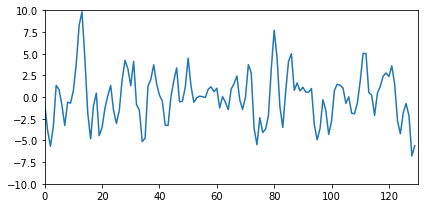

In [ ]:
hlp.plot1d(AD_train_arr_dim[116])

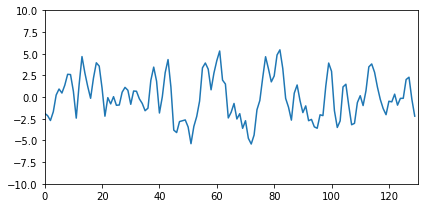

In [ ]:
hlp.plot1d(train_arr_dim[116])

## Jittering

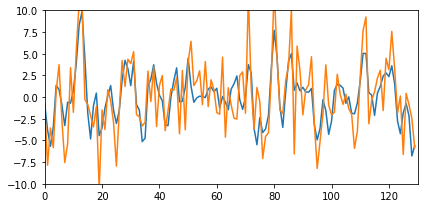

In [ ]:
hlp.plot1d(AD_train_arr_dim[0], aug.jitter(AD_train_arr_dim)[0])

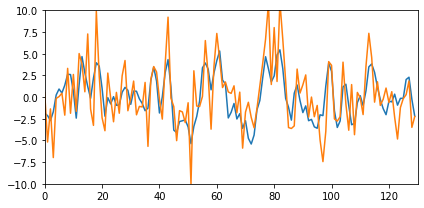

In [ ]:
hlp.plot1d(train_arr_dim[116], aug.jitter(train_arr_dim)[116])

In [ ]:

## Scaling

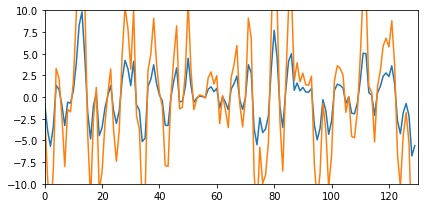

In [ ]:

hlp.plot1d(AD_train_arr_dim[0], aug.scaling(AD_train_arr_dim)[0])

In [ ]:
## Permutation

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


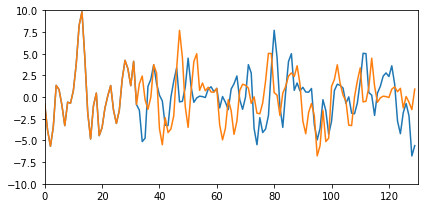

In [ ]:
hlp.plot1d(AD_train_arr_dim[0], aug.permutation(AD_train_arr_dim)[0])

In [ ]:
## Magnitude Warping

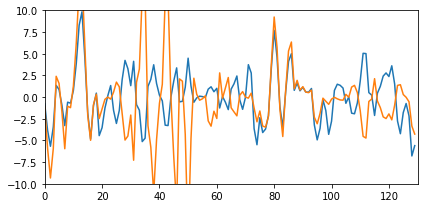

In [ ]:
hlp.plot1d(AD_train_arr_dim[0], aug.magnitude_warp(AD_train_arr_dim)[0])

In [ ]:
## Time Warping

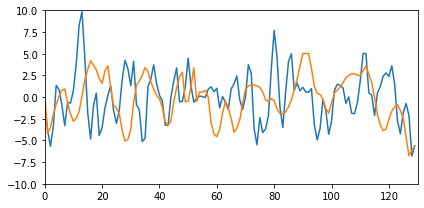

In [ ]:
hlp.plot1d(AD_train_arr_dim[0], aug.time_warp(AD_train_arr_dim)[0])

In [ ]:
## Rotation

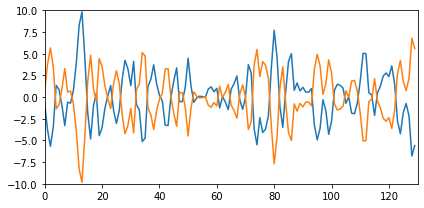

In [ ]:
hlp.plot1d(AD_train_arr_dim[0], aug.rotation(AD_train_arr_dim)[0])

In [ ]:
## Window Slicing

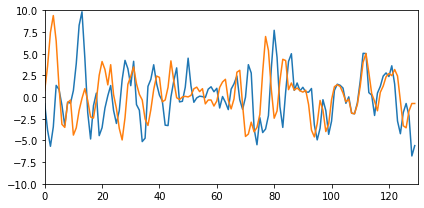

In [ ]:
hlp.plot1d(AD_train_arr_dim[0], aug.window_slice(AD_train_arr_dim)[0])

In [ ]:
## Window Warping

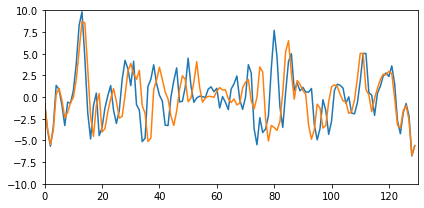

In [ ]:
hlp.plot1d(AD_train_arr_dim[0], aug.window_warp(AD_train_arr_dim)[0])

In [ ]:
## Suboptimal Warping Time Series Generator (SPAWNER)

100%|██████████| 2900/2900 [00:31<00:00, 91.18it/s]


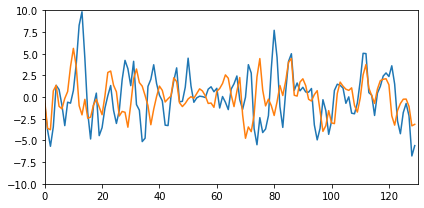

In [ ]:
hlp.plot1d(AD_train_arr_dim[0], aug.spawner(AD_train_arr_dim, AD_train_label)[0])

In [ ]:
## Weighted Dynamic Time Series Barycenter Averaging (wDBA)

In [ ]:
hlp.plot1d(train_arr_dim[0], aug.wdba(train_arr_dim, train_label)[0])

  0%|          | 35/10208 [00:09<48:23,  3.50it/s]


KeyboardInterrupt: ignored

In [ ]:
## Random Guided Warping

100%|██████████| 2900/2900 [00:30<00:00, 95.71it/s]


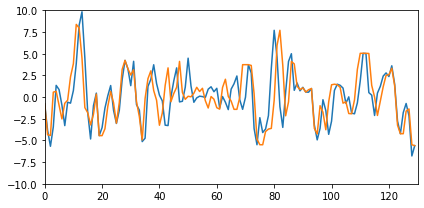

In [ ]:
hlp.plot1d(AD_train_arr_dim[0], aug.random_guided_warp(AD_train_arr_dim, AD_train_label)[0])

In [ ]:
## Discriminative Guided Warping

In [ ]:
hlp.plot1d(AD_train_arr_dim[0], aug.discriminative_guided_warp(AD_train_arr_dim, AD_train_label)[0])

100%|██████████| 10208/10208 [22:54<00:00,  7.43it/s]


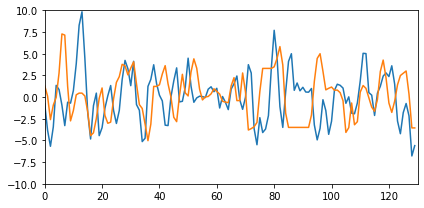

In [ ]:
hlp.plot1d(train_arr_dim[0], aug.discriminative_guided_warp(train_arr_dim, train_label)[0])

In [ ]:
!nvidia-smi

Mon Jan 10 22:05:47 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------